# Лабораторная работа 1
# Задача о падении тела. Построение графиков функций

Домаш Иван Дмитриевич, 12.02.2025

# Задание 1.1. Задача о падении тела

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и
высоте $h_{end}$.

**Предположения**.
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы
тяжести $${\bf F} = m (0,-g),$$ где $m$ -- масса тела, $g$ -- ускорение
свободного падения.
- Сопротивлением среды пренебрегаем.

**Данные**.
- Задача рассматривается при при следующих значениях параметров: $h_{start} =  $ 1 m , $h_{end} =  $ 3 m, $T = $ 3 s,  $s_{end} = $ 5 m.
- угол запуска тела  $\alpha$ не известен.
- Начальный момент времени движения тела полагаем равным нулю: $t=$ 0.
- Значение массы $m$ тела не повлияет на функции перемещения тела.

**Задания для выполнения**.
- $\color{red}\text{Определите}$ функцию перемещения тела $(s_{x}(t),s_{y}(t)) $ под действием силы тяжести, где $s_{x}(t),s_{y}(t)$ $-$ горизонтальная и вертикальная
составляющая положения тела в момент времени $t$, соответственно.

- $\color{red}\text{Найдите}$  угол запуска тела $\alpha$.
- $\color{red}\text{Постройте}$ график траектории движения тела $(s_{x}(t),s_{y}(t)) $ для $t \in [0, T] $


# Выполнение Задания 1.1
## Этап 1. Импортирование модулей
Импортируем модуль `math` с математическими функциями из стандартной
библиотеки:


In [261]:
import math

Импортируем расширение `numpy` и создадим псевдоним `np` для доступа к
инструментам модуля, не используя имя `numpy`

In [264]:
import numpy as np 

Расширение `numpy` основано на работе со структурой данных массив `( ndarray )`.
Массив `( ndarray )` не является встроенным типом данных Python, он является
базовым типом расширения `numpy` .
Импортируем модуль `pyplot` из пакета `matplotlib` для построения графиков.
Для этого примененим синтаксис `<имя пакета>.<имя модуля в пакете>` и
создадим псевдоним имени модуля `plt`


In [267]:
import matplotlib.pyplot as plt

Импортируем модуль constants из пакета расширений `scipy` с псевдонимом
`const` . Модуль constants предоставляет доступ к значениям физических
констант


In [270]:
import scipy.constants as const


Импортируем модуль `sympy` для символьных вычислений в Python

In [273]:
import sympy


## Этап 2. Создание переменных
**Переменные** создаются при первом присваивании им значений. Слева от
оператора присваивания ( `=` ) записывается переменная, справа — выражение,
результатом вычисления которого является объект: `переменная = объект `. Имена
переменных рекомендовано задавать в нижнем регистре с использованием знака
нижнего подчеркивания для смыслового разделения имени на части, например
`first_variable = 1` . Объявлять переменные перед их инициализацией не нужно

In [276]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 

Отобразить значение переменной можно, указав ее имя в ячейке ввода в
последней строке или с использованием встроенной функции `print`


In [279]:
print(h_start, h_end)


1 3.0


Определим значение ускорения свободного падения для дальнейших расчетов:

In [282]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}\text{Привожу}$ несколько примеров физических констант из модуля
`constants` пакета расширений `scipy`:

In [285]:
c = const.c
c

299792458.0

In [287]:
G = const.G
G


6.6743e-11

Временной отрезок $[0, T]$ представим в виде последовательности чисел. Cоздадим
последовательность равномерно распределенных чисел на отрезке $[0, T]$  с шагом
0.01 двумя способами: на основе встроенного типа список ( `list` ) и на основе
массива ( `ndarray` ) из расширения `numpy`

In [290]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step) 

$\color{red}\text{Сформулируем}$ Спецификации range и arange:
$range([start], stop, [step])
numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
$ `arange` используетсся для чисел с плавающей точкой
Примеры:

In [293]:
print(list(range(5))) 

[0, 1, 2, 3, 4]


In [295]:
print(np.arange(1.0, 2.0, 0.1))

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


*Запоминаем*, что после создания списка ( `list` ) его размер изменить можно, после
создания массива ( `ndarray` ) его размер изменить нельзя.


## Этап 3. Определение функции перемещения и нахождение угла запуска тела

$\color{red}\text{Напишем}$ подробно, как из второго закона Ньютона и начальных
условий получен аналитический вид функции перемещения $(s_{x}(t),s_{y}(t)) $.

Полагаем, что начало прямоугольной декартовой системы координат соответствует
уровню земли. Тогда в начальный момент движения тела $t$ = 0 имеем, что:

$s_{x}(0) = 0,s_{y}(0) = h_{start} $

Для построения функции перемещения $(s_{x}(t),s_{y}(t)) $ воспользуемся вторым
законом Ньютона:

$F = ma$,

где $m$ - масса тела, ускорение движения тела $а = (s_{x}''(t),s_{y}''(t))$ и приложенная сила $F = m(0, -g)$ . В результате имеем два уравнения, что 


 $s_{x}''(t) = 0,s_{y}''(t) = -g$


На основании уравнений с учетом начальных условий можно записать
аналитический вид  функций:


$s_{x}(t) = s_{x}(0) + v0_{x}t = 0 + v0_{x}t$

$s_{y}(t) = s_{y}(0) + v0_{y}t - \frac{g}{2} t^2 = h_{start} + v0_{y}t - \frac{g}{2} t^2 $


Из условия задачи имеем, что $s_{x}(T) = s_{end}$. Из этого соотношения находим значение для $v0_{x}$

In [301]:
v0_x = s_end/T
v0_x


1.6666666666666667

Из условия задачи имеем, что $s_{y}(T) = s_{end}$. Из этого соотношения находим значение для $v0_{y}$

In [304]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

Значение угла запуска тела определяем из соотношения $ tan \alpha = \frac{v0_{y}}{v0_{x}}$

In [307]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)


(1.462828312588189, 83.81388846354714)

Результирующая функция перемещения имеет следующий вид


In [310]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [312]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

## Этап 4. Построение графика траектории движения тела

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений $x$-координат точек графика функции и последовательность соответствующих значений $y$-координат точек
графика функции. На Этапе 2 было создано две последовательности равномерно распределенных
чисел на отрезке$[0, T]$ с шагом 0.01 для переменной времени $t$


In [316]:
t_list, t_array;

Определим списки чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в моменты времени `t_list` с использованием
формул, полученных на Этапе 3:

In [319]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в момент времени `t_array` :

In [322]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

*Обратим внимание*, что арифметические действия ( +, -,* , /, **) с массивами
`ndarray` выполняются **поэлементно** без использования дополнительного
синтаксиса.

Строим график траектории движения тела, используя инструменты модуля `pyplot`
пакета `matplotlib` . Смотрите **Help | Matplotlib Reference** для справочной
информации по используемым функциям: `figure` , `plot` , `title` , `xlabel` ,
`ylabel` , `axis` , `xlim` , `ylim` .


(0.0, 5.0, 0.0, 14.0)

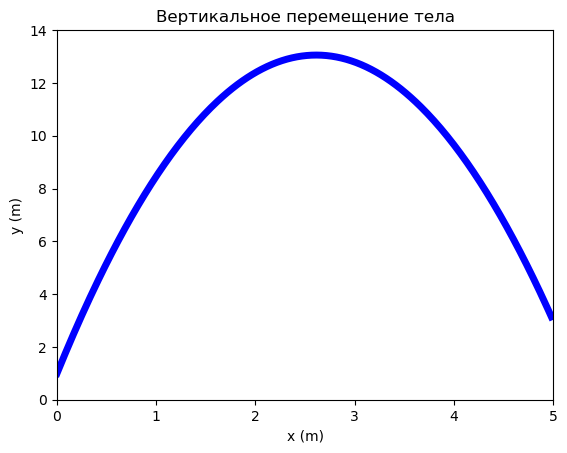

In [325]:



plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколь
plt.axis([0, s_end, 0, h_end+11])


При вызове функции `plot` из `pyplot` можно использовать как списки, так и
массивы.

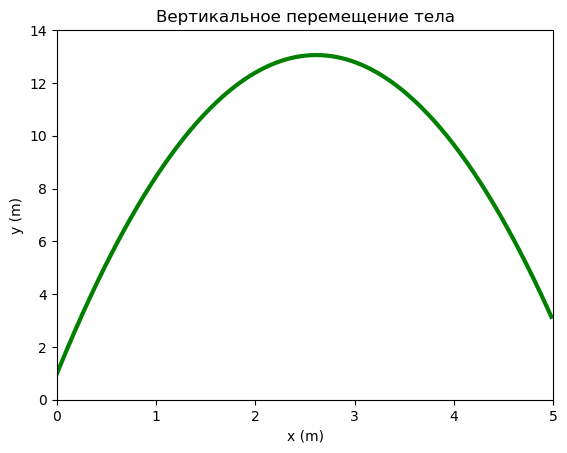

In [328]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);


# Задание 1.2. Определение момента времени касания телом земли

## Выполнение Задания 1.2

*Рассмотрим Подход 1* выполнения Задания 1.2.


Для решения алгебраического уравнения $s_{y}(t) = 0$ воспользуемся функцией
`solve` из модуля `sympy` , которая предназначена для решения алгебраических
уравнений и систем уравнений. Для выполнения функции `solve` предварительно с
помощью функции `symbols` необходимо создать **символьную переменную**,
относительно которой будет определено уравнение.


In [332]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [334]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

$\color{red}\text{Сформулируем}$ спецификации функций `symbols` и `solve` из
модуля `sympy`:
Функция `symbols` используется для создания символьных переменных и их символических представлений. Спецификация:$sympy.symbols(names, **args)$
Функция `solve` используется для решения уравнений и систем уравнений. Спецификация:
$sympy.solve(equations, *symbols, **flags)$

$\color{red}\text{Приведем}$ два примера решения:

In [337]:
from sympy import symbols, Eq, solve
x = symbols('x')

eq = Eq(x**2 - 4, 0)
solution = solve(eq, x)
print(solution)

[-2, 2]


In [339]:
eq = Eq(x**2 - 8, 0)
solution = solve(eq, x)
print(solution)

[-2*sqrt(2), 2*sqrt(2)]


# Задание 1.3. Построение секущей, касательной и нормали к графику функции
## Выполнение Задания 1.3

Подготовим необходимые данные для построения секущей прямой к траектории
движения тела.

Воспользуемся *векторно-параметрическим уравнением прямой* для заданной
точки $p_{start}$ , лежащей на прямой, и заданного направляющего вектора $a$

$p(t) = p_{start} + at$

Направляющий вектор можно определить как $a = p_{end} - p_{start}$, где точка $p_{end}$ лежит на прямой и отлична от точки $p_{start}$

Введем новые переменные для описания начальной точки $p_{start}$ и конечной точки $p_{end}$  через их координаты. Для новых переменных используем тип массив
( `ndarray` ) из `numpy` . Представление координат точек в виде массивов иногда эффективнее, чем представление в виде списков, для дальнейшей работы с
координатами.


In [342]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end


(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:

In [345]:
a = p_end-p_start


Для построения графика прямой достаточно задания двух точек, лежащих на
прямой:


In [348]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной
графической области:


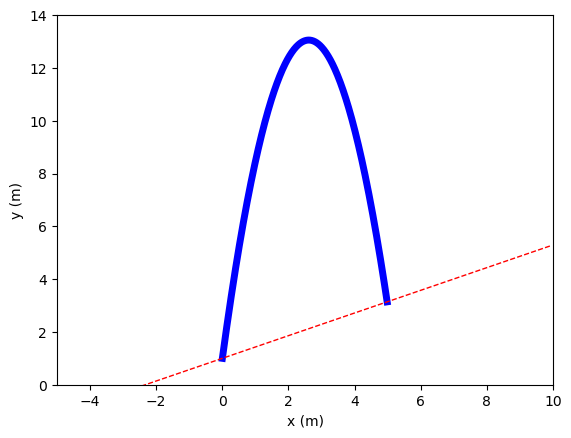

In [351]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1) # обратите внимание не специальную
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);


$\color{red}\text{Построим}$ график касательной прямой к траектории движения
тела в одной графической области с траекторией движения и секущей прямой в точке серединке по x

In [354]:


point_index = len(s_x_array) // 2
x_start = s_x_array[point_index]
y_start = s_y_array[point_index]

In [356]:

k = (v0_y - g * t_array[point_index])

In [358]:
_x = np.linspace(-5, 15, 100)
_y = k * (_x - x_start) + y_start

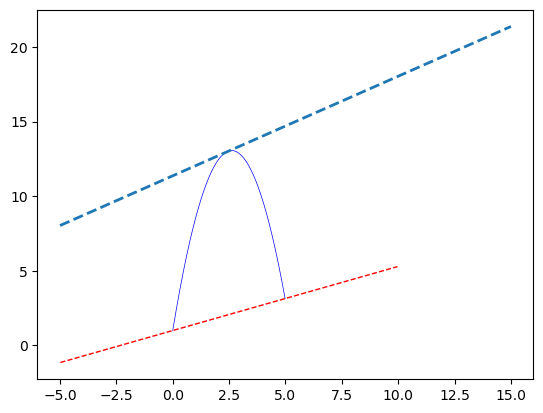

In [360]:
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=0.5)
plt.plot(p[:, 0], p[:, 1], '--', color='red', lw=1)
plt.plot(_x, _y, '--', lw=2)


 вычисляли угловой коэффициент 
𝑘
 для касательной прямой в одной из точек траектории как производную Sy по t в точке касания.
 Sy = h0 + v0yt + gt^2/2 
 Sy' = v0y + gt - это и есть наш коэф

$\color{red}\text{Сформулируем}$  уравнение нормальной прямой к
траектории движения тела в момент времени $t=0$ , используя свойство
перпендикуляртности каксательной и нормальной прямых.

Используя свойство перпендикулярности, найдем угловой коэффициент нормальной прямой 

:$k касательной * k нормальной = -1$


$k касат.$ в момент времени t = 0 ранво v0y
из этого:

$kнормальной = -1/v0y$

tеперь мы можем записать уравнение нормальной прямой в момент времени 
𝑡
= 0 

. $y = -1/v0y * x0 + h0$

In [364]:
normal_x = np.linspace(-5, 15, 100)  
normal_y = - (1/ v0_y) * normal_x + h_start

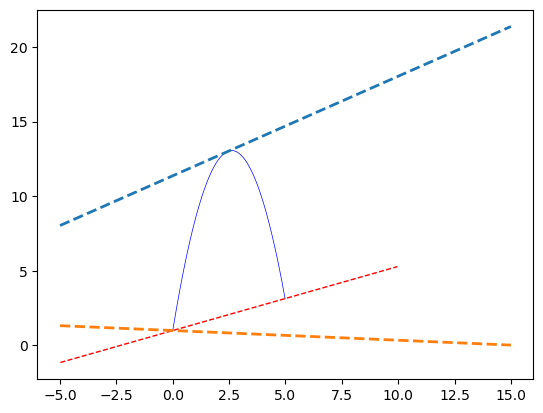

In [366]:
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=0.5)
plt.plot(p[:, 0], p[:, 1], '--', color='red', lw=1)
plt.plot(_x, _y, '--', lw=2)
plt.plot(normal_x, normal_y, '--', lw=2)

# Задание 1.4. Построение графиков функций
# Не понял как определить свой вариант, решил выбрать Вариант 4 


# a)

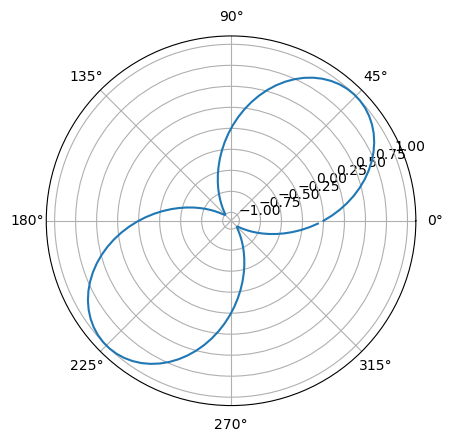

In [370]:
theta = np.arange(0, 2 * np.pi, 0.05)

r = np.sin(2 * theta)
plt.polar(theta, r)

# б)

In [373]:
t = np.arange(-1e6, 1e6, 0.05)
x = np.log(t + np.sqrt(t**2 + 1))
y = t * np.sqrt(t**2 + 1)

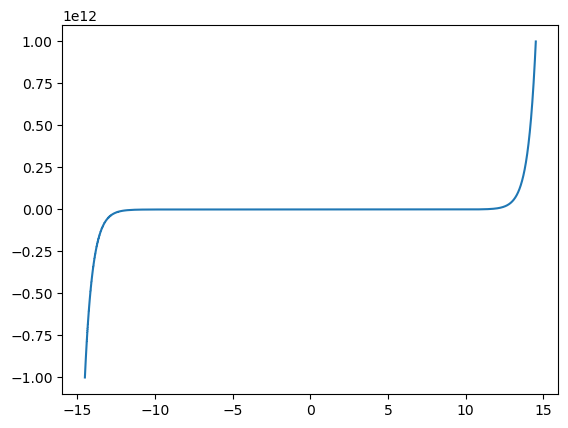

In [375]:
plt.plot(x, y)

# Контрольные вопросы

## ЛБ01 Часть 1. Введение в язык программирования Python

# 1. 
Основателем языка программирования Python является Гвидо ван Россум. Он начал разрабатывать Python в конце 1980-х годов, а первый релиз состоялся в феврале 1991 года. Разработка Python началась в Центре математики и информатики (CWI) в Нидерландах.

На сегодняшний день Python занимает высокие позиции в рейтингах использования языков программирования. В 2023 году он вошел в топ-3 самых популярных языков программирования, уступая только JavaScript и TypeScript. В 2025 году Python продолжает удерживать лидирующие позиции, оставаясь одним из самых востребованных языков программирования.

# 2.
~Простота и читаемость кода: Python отличается лаконичным и понятным синтаксисом, что упрощает изучение и работу с ним.

~Масштабируемость и гибкость: Подходит для создания как небольших скриптов, так и крупных проектов, поддерживающих масштабирование.

~Большое сообщество и поддержка: Обширное сообщество пользователей и разработчиков, доступность множества библиотек и фреймворков.

~Межплатформенность: Python работает на большинстве операционных систем, включая Windows, macOS и Linux.

~Поддержка интеграции: Легко интегрируется с другими языками программирования и технологиями, такими как C, C++, Java, .NET.

~Высокая производительность разработки: Позволяет быстро создавать и тестировать прототипы, благодаря динамической типизации и интерпретируемому характеру.

~Использование в различных областях: Применяется в веб-разработке, анализе данных, научных исследованиях, машинном обучении, автоматизации и многом другом.

~Активное развитие и обновления: Python постоянно развивается и обновляется, получая новые возможности и улучшения.

# 3. 
Фраза «Python поддерживает несколько парадигм программирования» означает, что Python можно использовать для программирования в различных стилях, которые имеют свои особенности и преимущества. Вот краткая характеристика каждой из основных парадигм:

Императивное программирование:

Описание: Программа описывает последовательность инструкций, изменяющих состояние системы.

Пример: Циклы for, while, оператор if.

Объектно-ориентированное программирование (ООП):

Описание: Программа организована вокруг объектов, которые являются экземплярами классов и имеют состояние (атрибуты) и поведение (методы).

Пример: Классы и объекты, наследование, полиморфизм.

Функциональное программирование:

Описание: Программа состоит из функций, которые принимают аргументы и возвращают значения, не изменяя состояние.

Пример: Лямбда-функции, функции map, filter, reduce.

Процедурное программирование:

Описание: Программа организована как набор процедур или подпрограмм, каждая из которых выполняет определенную задачу.

Пример: Определение и вызов функций, использование процедур.

Событийно-ориентированное программирование:

Описание: Программа реагирует на события, такие как действия пользователя или сообщения от других программ.

Пример: Обработчики событий в GUI-приложениях, веб-приложениях.

Асинхронное программирование:

Описание: Программа выполняет операции, не блокируя основной поток выполнения, используя асинхронные функции и конструкции.

Пример: async и await, асинхронные библиотеки и фреймворки.

# 4. 
Фраза "Python является интерпретируемым языком программирования" означает, что код программы на Python выполняется интерпретатором, а не компилируется в машинный код перед выполнением.
# 5. 
Один из основных недостатков языка Python — его относительно низкая скорость выполнения по сравнению с компилируемыми языками программирования, такими как C или C++. Поскольку Python является интерпретируемым языком, его код выполняется медленнее, особенно в задачах, требующих высокой производительности и быстродействия
# 6. 
Python используется в различных областях благодаря своей универсальности и широкому спектру библиотек. Вот несколько основных областей применения Python:

Веб-разработка:

Django и Flask — популярные веб-фреймворки на Python.

Примеры: Instagram, Spotify, Reddit.

Научные исследования и анализ данных:

Библиотеки: NumPy, Pandas, SciPy, Matplotlib.

Примеры: NASA, CERN.

Машинное обучение и искусственный интеллект:

Библиотеки: TensorFlow, Keras, Scikit-learn.

Примеры: Google, Netflix, Uber.

Автоматизация и скрипты:

Использование для автоматизации задач и написания скриптов.

Примеры: Dropbox, Quora.

# 7.
Структура программы на языке Python обычно состоит из следующих основных компонентов:
~ Импорт модулей
~ Определение функций
~ Определение классов
~ Основная логика программы
~Обработка ошибок
# 8.
Особенности языка Python
 ~ точки с запятой не нужны
 ~ вместо фигурных скобок используются отступы
# 9. 
PEP 8 расшифровывается как "Python Enhancement Proposal" (Предложение по улучшению Python) номер 8. Это руководство по стилю кода на языке Python, созданное для улучшения читаемости кода и содействия консистентности кода между разными проектами.
     Вот некоторые из основных соглашений, прописанных в PEP 8:

Отступы:

Используйте 4 пробела для отступов. Не используйте табуляции.

Максимальная длина строки:

Ограничьте длину строк до 79 символов. Для строк документации (docstrings) и комментариев – до 72 символов.

# 10. 
Свободное ПО: Это означает, что JupyterLab можно свободно использовать, распространять и изменять. Это программное обеспечение доступно для всех без каких-либо лицензионных ограничений.

Открытый код: Исходный код JupyterLab доступен для общественности. Любой желающий может просматривать, изменять и вносить вклад в разработку этого ПО. Это способствует развитию сообщества и улучшению качества программного обеспечения.


## ЛБ01 Часть 2. Работа с ячейками в документе .ipynb

# 1. 
Ячейка кода – это сущность документа .ipynb, которая содержит программный код, предназначена для выполнения и анализа кода, результат выполнения ячейки отображается непосредственно под ячейкой в виде вывода (например, значения переменных, графики, ошибки и т.д.).
   Ячейка редактирования (она же текстовая ячейка, markdown-ячейка) – это сущность документа .ipynb, которая содержит текст, написанный с использованием языка разметки Markdown, предназначена для добавления описаний, комментариев, заголовков и других текстовых элементов, результат выполнения ячейки отображается в виде отформатированного текста.
# 2. 
В командном режиме Jupyter Notebook (также известном как "Command Mode") можно выполнять различные действия с ячейками. Вот некоторые из них:

Навигация:

Перемещение вверх и вниз по ячейкам с помощью стрелок вверх (↑) и вниз (↓).

Редактирование:

Вход в режим редактирования ячейки с помощью клавиши Enter.

Выход из режима редактирования ячейки и возвращение в командный режим с помощью клавиши Esc.

Создание новых ячеек:

Создание новой ячейки выше текущей с помощью A (от слова "Above").

Создание новой ячейки ниже текущей с помощью B (от слова "Below").

Удаление ячеек:

Удаление выбранной ячейки с помощью D дважды (DD).

Копирование и вставка ячеек:

Копирование текущей ячейки с помощью C.

Вставка скопированной ячейки ниже текущей с помощью V.

Вырезание и вставка ячеек:

Вырезание текущей ячейки с помощью X.

Вставка вырезанной ячейки ниже текущей с помощью V.

Перемещение ячеек:

Перемещение текущей ячейки вверх с помощью Shift + K.

Перемещение текущей ячейки вниз с помощью Shift + J.

Изменение типа ячейки:

Преобразование текущей ячейки в ячейку кода с помощью Y.

Преобразование текущей ячейки в ячейку Markdown с помощью M.

**Запуск ячеек

# 3. 
В документах .ipynb Jupyter Notebook используются два основных языка разметки для форматирования текста:

Markdown

Назначение: Markdown используется для создания хорошо оформленных текстовых блоков, которые могут включать заголовки, списки, ссылки, изображения и даже встроенный код. Этот язык разметки позволяет легко структурировать информацию и делать заметки более читабельными. Благодаря простоте синтаксиса, его можно использовать без значительных усилий.

LaTeX

Назначение: LaTeX в Jupyter Notebook используется для написания сложных математических формул и уравнений. Этот язык разметки позволяет точно и красиво форматировать математический контент, который часто необходим в научных и инженерных документах. LaTeX особенно полезен для демонстрации подробных математических выражений, графиков и таблиц.
# A)
Сделать ячейку документа активной:

Нажмите на ячейку, чтобы сделать её активной.

Создать ячейку выше активной:

A

Создать ячейку ниже активной:

B

Установить для активной ячейки тип Code:

Y

Установить для активной ячейки тип Markdown:

M

Активную ячейку перевести в режим редактирования:

Enter

Активную ячейку перевести в командный режим:

Esc

Копировать активную ячейку в буфер обмена:

C

Вставить скопированную ячейку из буфера:

V

Вырезать активную ячейку:

X

Удалить активную ячейку:

D, D (быстро нажать D дважды)

Сделать активными несколько подряд стоящих ячеек:

Удерживая клавишу Shift, нажимайте на ячейки, которые хотите выделить.

Объединить активные ячейки:

Shift + M

Разделить активную ячейку по курсору:

Ctrl + Shift + -

Отменить последнее действие с ячейками:

Z
# Б)
Создание заголовка первого уровня:


# Заголовок первого уровня
Создание заголовка второго уровня:

## Заголовок второго уровня
Создание заголовка уровня n: (для уровня n используется n символов #)


### Заголовок третьего уровня
#### Заголовок четвертого уровня
##### Заголовок пятого уровня
###### Заголовок шестого уровня
Создание ненумерованного списка:


- Первый элемент
- Второй элемент
  - Подэлемент
* Третий элемент
Выделение текста курсивом:


*Курсив* или _Курсив_
Выделение текста жирным шрифтом:


**Жирный текст** или __Жирный текст__
Создание математического выражения без перехода на новую строку:


\(y = mx + b\)
Создание математического выражения с переходом на новую строку:


$$
y = mx + b
$$
Отображение последовательности символом указанным цветом: Для этого можно использовать HTML внутри Markdown.


<span style="color: red;">текст</span>

# ЛБ01 Часть 3. Использование некоторых модулей и расширений


# 1.
Модуль, который содержит математические функции в Python, называется math. Чтобы его использовать, нужно подключить его с помощью команды import. Вот пример того, как это сделать:


In [10]:
import math

# 2.

In [15]:

import math
a = math.pi / 4 


sina = math.sin(a)


print("Синус угла в 45 градусов (π/4 радиана) равен:", sina)


Синус угла в 45 градусов (π/4 радиана) равен: 0.7071067811865476


# 3.

In [18]:
import matplotlib.pyplot as plt

# 4.

`numpy`


# 5.

Модуль, содержащий значения физических констант в Python, называется `constants`. Этот модуль находится в пакете `scipy`.

# 6.

In [27]:

from scipy import constants


g = constants.g


print("Ускорение свободного падения:", g, "м/с²")


Ускорение свободного падения: 9.80665 м/с²


# 7.

Модуль `sympy` предназначен для выполнения символьных вычислений в Python. Он позволяет решать математические задачи символически, а не численно, что особенно полезно для алгебраических преобразований, решения уравнений, интегрирования, дифференцирования и упрощения выражений.

# 8.

In [32]:

import sympy as sp


x = sp.symbols('x')


equation = sp.Eq(x**2 + 3*x - 4, 0)


solutions = sp.solve(equation, x)


print("Решения уравнения:", solutions)


Решения уравнения: [-4, 1]


# ЛБ01 Часть 4. Использование функций графики

# 1.

Cпецификация:

range(start, stop[, step])

start (необязательный) - начальное значение последовательности. По умолчанию равно 0.

stop (обязательный) - конечное значение последовательности (не включается в последовательность).

step (необязательный) - шаг между значениями в последовательности. По умолчанию равен 1.

Примеры использования функции `range`:


In [45]:
print(list(range(5)))



[0, 1, 2, 3, 4]


In [47]:
print(list(range(2, 7)))

[2, 3, 4, 5, 6]


In [49]:
print(list(range(1, 11, 2)))

[1, 3, 5, 7, 9]


# 2.


Функция `numpy.arange` используется для создания одномерного массива с равномерно разнесенными значениями в заданном диапазоне. Вот ее спецификация:
numpy.arange([start, ]stop, [step, ]dtype=None, like=None)


start (необязательный) - начальное значение последовательности. По умолчанию равно 0.

stop (обязательный) - конечное значение последовательности (не включается в массив).

step (необязательный) - шаг между значениями в последовательности. По умолчанию равен 1.

dtype (необязательный) - тип данных элементов массива. Если не указан, тип будет определен автоматически.

like (необязательный) - массив, подобный которому нужно создать.

*Примеры*:

In [56]:
import numpy as np
arr = np.arange(100)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [58]:
arr = np.arange(37, 73)
print(arr)

[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72]


In [60]:
arr = np.arange(2, 16, 2)
print(arr)

[ 2  4  6  8 10 12 14]


# 3.

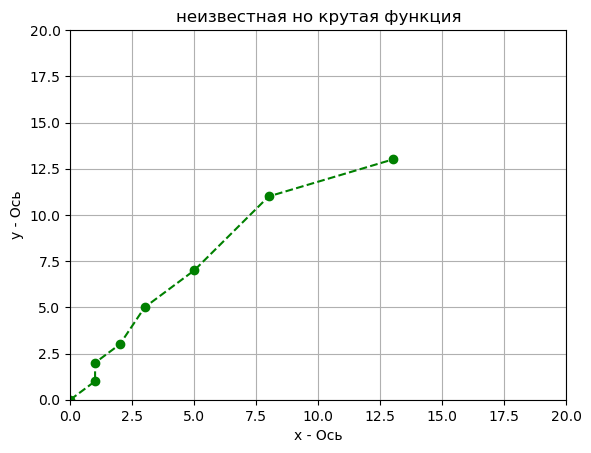

In [87]:
import matplotlib.pyplot as plt


x_list = [0, 1, 1, 2, 3, 5, 8, 13]
y_list = [0, 1, 2, 3, 5, 7, 11, 13]

#  график
plt.plot(x_list, y_list, marker='o', linestyle='--',color='g',  label='неизвестная но крутая функция')

#  оси
plt.xlabel('x - Ось')
plt.ylabel('y - Ось')

# позывной
plt.title('неизвестная но крутая функция')

#  сетка
plt.grid(True)

# пределы
plt.xlim([0, 20])
plt.ylim([0, 20])

# показываем
plt.show()


# 4.

Text(0.5, 1.0, 'sin(alp)')

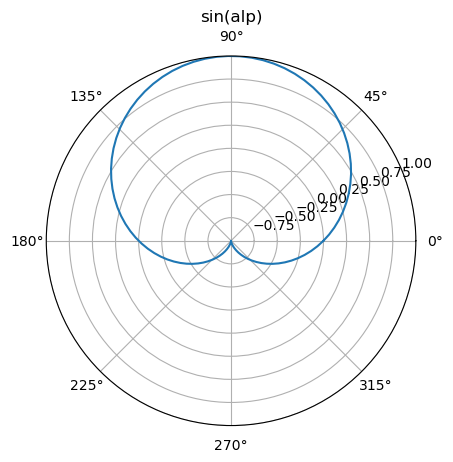

In [174]:
import matplotlib.pyplot as plt
import numpy as np


alp = np.linspace(0, 2 * np.pi, 100)
r = np.sin(alp)


plt.polar(alp, r, label='sin(alp)')

plt.ylim([-1, 1])
plt.xlim([0, 2 * np.pi])
plt.title('sin(alp)')

